In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
from keras import regularizers
import os
mylist= os.listdir('Data/')

In [3]:
mylist


['03-01-01-01-01-01-01.wav',
 '03-01-01-01-01-01-02.wav',
 '03-01-01-01-01-01-03.wav',
 '03-01-01-01-01-01-04.wav',
 '03-01-01-01-01-01-05.wav',
 '03-01-01-01-01-01-06.wav',
 '03-01-01-01-01-01-07.wav',
 '03-01-01-01-01-01-08.wav',
 '03-01-01-01-01-01-09.wav',
 '03-01-01-01-01-01-10.wav',
 '03-01-01-01-01-01-11.wav',
 '03-01-01-01-01-01-12.wav',
 '03-01-01-01-01-01-13.wav',
 '03-01-01-01-01-01-14.wav',
 '03-01-01-01-01-01-15.wav',
 '03-01-01-01-01-01-16.wav',
 '03-01-01-01-01-01-17.wav',
 '03-01-01-01-01-01-18.wav',
 '03-01-01-01-01-01-19.wav',
 '03-01-01-01-01-01-20.wav',
 '03-01-01-01-01-01-21.wav',
 '03-01-01-01-01-01-22.wav',
 '03-01-01-01-01-01-23.wav',
 '03-01-01-01-01-01-24.wav',
 '03-01-01-01-01-02-01.wav',
 '03-01-01-01-01-02-02.wav',
 '03-01-01-01-01-02-03.wav',
 '03-01-01-01-01-02-04.wav',
 '03-01-01-01-01-02-05.wav',
 '03-01-01-01-01-02-06.wav',
 '03-01-01-01-01-02-07.wav',
 '03-01-01-01-01-02-08.wav',
 '03-01-01-01-01-02-09.wav',
 '03-01-01-01-01-02-10.wav',
 '03-01-01-01-

In [4]:
import webbrowser
import pyttsx3
def emotion(lis):   
    for i in lis:
        engine = pyttsx3.init()
        voices = engine.getProperty('voices') 
        engine.setProperty('rate', 122)
        engine.setProperty('voice', voices[1].id)   
        engine.say(i)
        engine.runAndWait()
        if "happy" in i:
            #kalavathi
            return webbrowser.open('https://www.youtube.com/watch?v=Vbu44JdN12s')          
        elif "sad" in i:
            #keshava 
            return webbrowser.open("https://www.youtube.com/watch?v=Jvc0afR-G3E")    
        elif "angry" in i:
            #angry bird
            return   webbrowser.open("youtube.com/watch?v=qWOnFlUTMfo")    
        elif  "fear" in i:
            #radhe shyam
            return  webbrowser.open("https://www.youtube.com/watch?v=vHuBCcm7KC8")
        else:
            return "undefined"

In [5]:
print(mylist[400][6:-16])

03


In [6]:
mylist[-1]

'YAF_youth_sad.wav'

In [7]:
#Plotting the audio file's waveform and its spectrogram

In [8]:
data, sampling_rate = librosa.load('Data/f11 (2).wav')

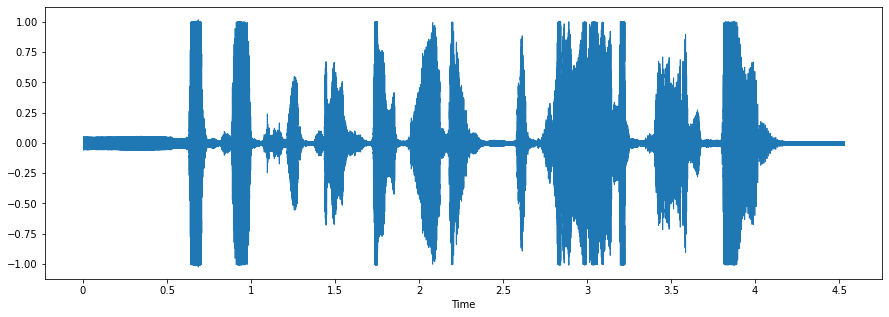

In [9]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

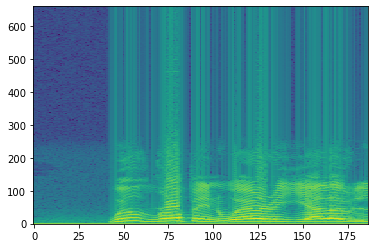

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('Data/f10 (2).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()


In [11]:
#PreProcessing(Setting the labels)

In [12]:
#19th char odd  - male
#19th char even -female
#7TH CHAR    -     # 2 - calm
                   #3 - happy
                   #4-sad
                   #5-angry
                   #6-fear 

In [13]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')
    elif item[0]=="O" and "angry" in item:
        feeling_list.append('male_angry')
    elif item[0]=="O" and "happy" in item:
        feeling_list.append('male_happy')
    elif item[0]=="O" and "sad" in item:
        feeling_list.append('male_sad')
    elif item[0]=="O" and "fear" in item:
        feeling_list.append('male_fearful')
    elif item[0]=="Y" and "angry" in item:
        feeling_list.append('female_angry')
    elif item[0]=="Y" and "happy" in item:
        feeling_list.append('female_happy')
    elif item[0]=="Y" and "sad" in item:
        feeling_list.append('female_sad')
    elif item[0]=="Y" and "fear" in item:
        feeling_list.append('female_fearful')

In [14]:
labels = pd.DataFrame(feeling_list)
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [15]:
#Getting the features of audio files using libros

In [16]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('Data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),axis=0)
        feature = mfccs
        
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [17]:
df[:5]

,feature
0,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."
1,"[-65.70765, -65.70765, -63.11472, -61.518997, ..."
2,"[-65.4825, -65.4825, -65.4825, -65.4825, -65.4..."
3,"[-64.52845, -64.52845, -64.52845, -64.52845, -..."
4,"[-63.645668, -59.99304, -61.869602, -67.49577,..."


In [18]:
df

,feature
0,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."
1,"[-65.70765, -65.70765, -63.11472, -61.518997, ..."
2,"[-65.4825, -65.4825, -65.4825, -65.4825, -65.4..."
3,"[-64.52845, -64.52845, -64.52845, -64.52845, -..."
4,"[-63.645668, -59.99304, -61.869602, -67.49577,..."
...,...
2795,"[-16.667006, -19.118837, -28.437143, -27.30205..."
2796,"[-12.501873, -16.183062, -26.792236, -28.44284..."
2797,"[-16.801609, -19.405287, -23.237358, -21.37650..."
2798,"[-15.936926, -20.01781, -28.761425, -26.034485..."


In [19]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [20]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-57.447464,-58.896500,-58.750996,-57.405678,-60.078484,-63.426800,-62.638542,-61.241898,-61.355312,male_calm
1,-65.707649,-65.707649,-63.114719,-61.518997,-61.097141,-63.424599,-63.720066,-56.854614,-55.168972,-54.639999,...,-39.792141,-40.613159,-41.209202,-41.439201,-43.994286,-49.399620,-50.591599,-49.111824,-48.155380,female_calm
2,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,...,-31.346558,-34.310772,-35.800705,-35.936115,-37.631844,-40.119411,-41.662888,-41.552467,-41.973667,male_calm
3,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-65.928223,...,-48.674301,-48.596073,-47.602745,-43.049198,-42.659542,-43.188560,-44.001244,-43.328056,-42.984985,female_calm
4,-63.645668,-59.993038,-61.869602,-67.495773,-71.071808,-65.679817,-63.394402,-65.503349,-61.856644,-60.005428,...,-39.071327,-41.897121,-40.865437,-38.290604,-36.372398,-37.915779,-40.026127,-43.313309,-44.846916,male_calm


In [21]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1738,-24.947386,-27.239439,-33.365788,-32.372124,-30.337673,-28.423452,-26.476299,-24.095430,-23.459517,-24.126625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_happy
809,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,...,-58.957596,-58.239361,-57.858303,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,-58.957596,female_fearful
1760,-15.520690,-18.832460,-29.511463,-27.123127,-26.854469,-29.097202,-31.784515,-30.565138,-30.067280,-31.569359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
775,-54.751919,-55.369957,-53.186375,-52.254326,-49.704861,-49.950874,-50.809067,-49.364090,-50.649765,-49.914280,...,-41.768124,-44.666878,-45.337132,-44.858768,-45.288803,-45.725979,-46.324211,-46.155128,-45.945061,female_fearful
984,-14.556315,-17.813595,-24.185272,-24.487667,-25.568796,-25.687105,-26.123718,-24.602633,-25.202267,-26.601835,...,-24.096914,-24.228182,-26.121641,-25.542942,-25.426659,-26.528730,-25.089243,-22.034832,-15.737650,male_angry
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-57.447464,-58.896500,-58.750996,-57.405678,-60.078484,-63.426800,-62.638542,-61.241898,-61.355312,male_calm
2038,-16.907219,-19.916866,-25.885244,-22.890045,-20.843697,-20.004595,-22.671040,-25.492458,-24.125462,-22.593739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
1071,-8.851844,-11.986833,-16.288795,-11.379371,-4.384048,-2.022365,-2.588405,-4.300551,-4.970526,-6.814387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fearful
2732,-15.408729,-19.059528,-26.972900,-28.539734,-29.832500,-28.310596,-28.815376,-27.580606,-28.020580,-28.075634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry
2224,-12.174267,-15.617759,-21.178995,-21.216887,-24.409382,-26.089252,-26.744982,-27.064165,-26.571341,-25.853844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry


In [22]:
rnewdf=rnewdf.fillna(0)

In [23]:
#Dividing the data into test and train

In [24]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [25]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
2799,-9.442860,-14.346351,-28.712574,-27.834110,-28.788393,-28.351210,-29.132456,-28.839855,-28.721010,-29.444035,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_sad
1135,-2.237383,-4.699732,-13.209988,-13.317596,-12.084839,-10.208436,-12.682105,-15.870907,-15.592797,-14.468443,...,-12.911617,-11.744254,-9.940099,-10.685195,-9.927693,-9.015005,-7.486831,-5.752022,1.584844,male_happy
1931,-16.932804,-20.561787,-30.728294,-30.949505,-29.805460,-29.917847,-29.409513,-30.506258,-32.104000,-32.381916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad
2090,-8.367875,-11.506179,-22.441868,-24.708509,-25.157076,-23.075447,-22.520029,-25.135607,-26.393852,-26.366091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_happy
2033,-20.016069,-17.449993,-19.016293,-21.880695,-23.602236,-25.308086,-28.397778,-26.763062,-26.869499,-25.546907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_fearful
1495,-22.468660,-24.912052,-33.127964,-31.912407,-31.850922,-33.088139,-32.399784,-32.997066,-32.329830,-32.662941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad
1314,-19.492075,-22.202820,-25.337786,-22.327291,-21.239088,-20.380249,-21.320431,-21.560551,-21.829838,-22.207933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_happy
1929,-17.570833,-20.395906,-29.915562,-29.743099,-30.414192,-30.899841,-30.463938,-29.677570,-29.999554,-29.423393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_fearful
230,-55.772057,-52.242367,-52.914917,-53.042610,-52.869320,-55.149212,-60.087891,-56.723209,-54.732597,-56.222458,...,-51.273087,-51.264603,-49.336857,-49.406067,-49.028599,-47.317200,-48.304497,-46.724800,-42.876266,male_happy
1958,-31.296492,-28.843040,-29.312561,-29.340700,-29.309517,-31.234791,-31.892527,-29.230808,-26.412685,-25.962688,...,-28.468334,-29.646355,-28.075077,-28.881575,-28.615490,-28.692484,-28.945385,-25.849606,-23.160530,male_sad


In [26]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [27]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\prudh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
X_train.shape

(2247, 216)

In [29]:
#Changing dimension for CNN model

In [30]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [31]:
from tensorflow import keras
from keras import optimizers
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout (Dropout)           (None, 216, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                        

In [33]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [34]:
#Removed the whole training part for avoiding unnecessary long epochs list
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/Emotion_Voice_Detection_Model.h5', 
                               verbose=1, save_best_only=True)


In [35]:
#fitting the model

In [35]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=100, validation_data=(x_testcnn, y_test),callbacks=[checkpointer])

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 2.3203 - accuracy: 0.1424
Epoch 1: val_loss improved from inf to 2.14742, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 14s 178ms/step - loss: 2.3203 - accuracy: 0.1424 - val_loss: 2.1474 - val_accuracy: 0.2098
Epoch 2/100
70/71 [============================>.] - ETA: 0s - loss: 2.0742 - accuracy: 0.2692
Epoch 2: val_loss improved from 2.14742 to 2.02080, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 160ms/step - loss: 2.0740 - accuracy: 0.2697 - val_loss: 2.0208 - val_accuracy: 0.2839
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.9565 - accuracy: 0.3191
Epoch 3: val_loss improved from 2.02080 to 1.94381, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 156ms/step - loss: 1.9565 - accuracy: 0.3191 - val_loss: 1.9438 - va

71/71 [==============================] - 14s 198ms/step - loss: 1.4129 - accuracy: 0.5029 - val_loss: 1.4732 - val_accuracy: 0.4430
Epoch 26/100
71/71 [==============================] - ETA: 0s - loss: 1.4002 - accuracy: 0.4998
Epoch 26: val_loss improved from 1.47319 to 1.46586, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 155ms/step - loss: 1.4002 - accuracy: 0.4998 - val_loss: 1.4659 - val_accuracy: 0.4593
Epoch 27/100
70/71 [============================>.] - ETA: 0s - loss: 1.3892 - accuracy: 0.5152
Epoch 27: val_loss improved from 1.46586 to 1.46309, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 156ms/step - loss: 1.3900 - accuracy: 0.5145 - val_loss: 1.4631 - val_accuracy: 0.4467
Epoch 28/100
70/71 [============================>.] - ETA: 0s - loss: 1.3747 - accuracy: 0.5143
Epoch 28: val_loss improved from 1.46309 to 1.45194, saving model to saved_models\Emot

Epoch 52/100
70/71 [============================>.] - ETA: 0s - loss: 1.1603 - accuracy: 0.6192
Epoch 52: val_loss did not improve from 1.28059
71/71 [==============================] - 13s 177ms/step - loss: 1.1635 - accuracy: 0.6186 - val_loss: 1.2825 - val_accuracy: 0.5353
Epoch 53/100
70/71 [============================>.] - ETA: 0s - loss: 1.1530 - accuracy: 0.6098
Epoch 53: val_loss did not improve from 1.28059
71/71 [==============================] - 11s 156ms/step - loss: 1.1527 - accuracy: 0.6097 - val_loss: 1.3000 - val_accuracy: 0.5262
Epoch 54/100
70/71 [============================>.] - ETA: 0s - loss: 1.1507 - accuracy: 0.6161
Epoch 54: val_loss improved from 1.28059 to 1.26781, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 155ms/step - loss: 1.1519 - accuracy: 0.6150 - val_loss: 1.2678 - val_accuracy: 0.5389
Epoch 55/100
71/71 [==============================] - ETA: 0s - loss: 1.1401 - accuracy: 0.6128
Epoch 55:

Epoch 79/100
70/71 [============================>.] - ETA: 0s - loss: 0.9995 - accuracy: 0.6625
Epoch 79: val_loss did not improve from 1.17419
71/71 [==============================] - 11s 152ms/step - loss: 0.9998 - accuracy: 0.6622 - val_loss: 1.1780 - val_accuracy: 0.5624
Epoch 80/100
70/71 [============================>.] - ETA: 0s - loss: 0.9941 - accuracy: 0.6665
Epoch 80: val_loss improved from 1.17419 to 1.15731, saving model to saved_models\Emotion_Voice_Detection_Model.h5
71/71 [==============================] - 11s 157ms/step - loss: 0.9946 - accuracy: 0.6667 - val_loss: 1.1573 - val_accuracy: 0.5732
Epoch 81/100
70/71 [============================>.] - ETA: 0s - loss: 0.9915 - accuracy: 0.6705
Epoch 81: val_loss did not improve from 1.15731
71/71 [==============================] - 11s 153ms/step - loss: 0.9920 - accuracy: 0.6693 - val_loss: 1.1808 - val_accuracy: 0.5769
Epoch 82/100
70/71 [============================>.] - ETA: 0s - loss: 0.9851 - accuracy: 0.6661
Epoch 82:

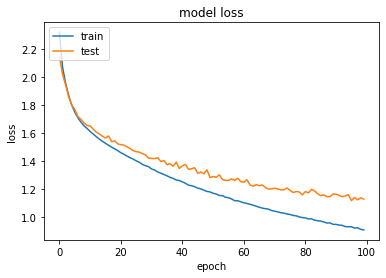

In [36]:
#epochs=list(range(200))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

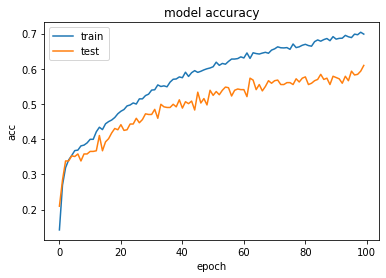

In [37]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
#Saving the model

In [39]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\prudh\saved_models\Emotion_Voice_Detection_Model.h5 


In [40]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [41]:
#Loading the model

In [42]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 60.94%


In [43]:
#Predicting emotions on the test data

In [44]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

18/18 [==============================] - 1s 36ms/step


In [45]:
preds1=preds.argmax(axis=1)

In [46]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
#preddf[:10]

In [47]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})
#actualdf[:10]

In [48]:
finaldf = actualdf.join(preddf)

In [49]:
#Actual v/s Predicted emotions

In [50]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_fearful,male_happy
171,male_fearful,female_happy
172,female_happy,female_fearful
173,female_fearful,male_happy
174,female_angry,female_angry
175,male_angry,male_fearful
176,female_fearful,female_fearful
177,male_angry,male_angry
178,male_calm,male_calm
179,male_angry,male_angry


In [51]:
finaldf.to_csv('Predictions.csv', index=False)

In [52]:
#Demo

In [53]:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [54]:
data, sampling_rate = librosa.load('output10.wav')

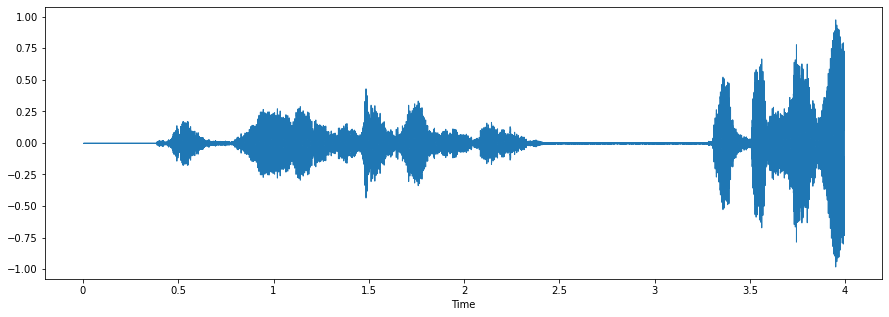

In [55]:
import os
import pandas as pd
import librosa
import glob 
#
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [72]:
X,sample_rate = librosa.load('data/03-01-02-02-02-01-08.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T

In [73]:
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
#livepreds

1/1 [==============================] - 0s 22ms/step


In [74]:
livepreds1=livepreds.argmax(axis=1)
#livepreds1
liveabc = livepreds1.astype(int).flatten()
#liveabc
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female_fearful'], dtype=object)

In [75]:
emotion(livepredictions)

True

s